In [2]:
# Code from https://medium.com/coinmonks/an-introduction-to-cnns-and-a-step-by-step-model-of-a-digit-recognizer-using-mnist-database-in-f4ea6af06d77

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [27]:
# Load files and assign variables to X and Y
#train = pd.read_csv("sign-language-mnist/sign_mnist_train.csv")
#test = pd.read_csv("sign-language-mnist/sign_mnist_test.csv")
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")
X_test = test.drop(labels=['label'], axis=1)
Y_test = test['label']
# Classes labeled as 1-24; Need to change to 0-23 for to_categorical
Y_test = to_categorical(Y_test - 1, num_classes = 24)
Y_train = train['label']
Y_train = to_categorical(Y_train - 1, num_classes = 24)
X_train = train.drop(labels=['label'], axis=1)

In [28]:
# Normalize pixels
X_train = X_train/255
X_test = X_test/255

In [29]:
# Convert data to 2D form to represent height x width
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
# Split training set into 10% validation and 90% training
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [43]:
# First 4 layers of model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Dropout reduces overfitting
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15 # number of epochs can be changed to reduce runtime (30 gave 96.7% accuracy, 15 gave 97.4%)
batch_size = 64
# learning rate halves if accuracy is unchanged after 3 iterations
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [44]:
final = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])
results = model.predict(X_test) # predict test labels


Train on 24709 samples, validate on 2746 samples
Epoch 1/30
24709/24709 [==============================] - 66s 3ms/step - loss: 1.2169 - accuracy: 0.6205 - val_loss: 0.3273 - val_accuracy: 0.8926
Epoch 2/30


C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


24709/24709 [==============================] - 71s 3ms/step - loss: 0.1209 - accuracy: 0.9586 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/30
24709/24709 [==============================] - 69s 3ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 1.7948e-04 - val_accuracy: 1.0000
Epoch 4/30
24709/24709 [==============================] - 70s 3ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 1.9011e-05 - val_accuracy: 1.0000
Epoch 5/30
24709/24709 [==============================] - 70s 3ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 2.6025e-05 - val_accuracy: 1.00000.0241  -
Epoch 6/30
24709/24709 [==============================] - 70s 3ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 4.2538e-06 - val_accuracy: 1.0000
Epoch 7/30
24709/24709 [==============================] - 70s 3ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 2.6217e-06 - val_accuracy: 1.0000
Epoch 8/30
24709/24709 [==============================] - 69s 3ms/step - loss: 0.0141 - accuracy: 0.

In [45]:
# Get CNN test error
model.evaluate(X_test, Y_test)

7172/7172 [==============================] - 4s 544us/step


[0.5452571326590138, 0.9668154120445251]

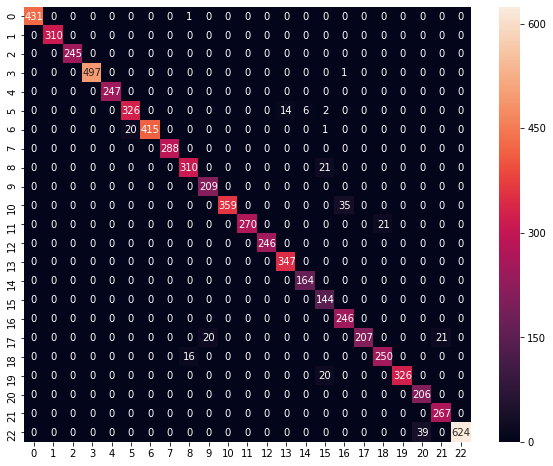

In [48]:
from sklearn.metrics import confusion_matrix
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(results, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# Create confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");